## Exploring Conduit and Contractile Strains

This notebook is for exploring the differences in conduit and contractile phase strains between patient groups

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from hrs_23_figures import *

from sklearn import metrics

regions=['global', 'roof', 'sept', 'lat', 'ant', 'post']

In [21]:
path="/home/csi20/Dropbox/phd/Data/kiru_demographics_df_omitAFimaging.csv"

In [22]:
cases_df = pd.read_csv(path)

In [23]:
## Load all strains

dataPath = "/home/csi20local/Data/RG_CT_Cases"
dataPath = "/home/csi20/Dropbox/phd/Data/RG_CT_Cases"

# N_cases, N_strain_phases
strains = np.zeros((cases_df.shape[0], 3))
fibre_strains = np.zeros((cases_df.shape[0], 3))
strains_vxm = np.zeros((cases_df.shape[0], 3))
fibre_strains_vxm = np.zeros((cases_df.shape[0], 3))

for j in range(0, cases_df.shape[0]):
    case = cases_df['Case'].iloc[j]
    
    filepath = get_tsffd_trackingpath(case)
    filepath_vxm = get_vxm_trackingpath(case)
    
    for i in range(0, len(regions)):
        region = regions[i]

        ## area strains
        
        ## tsffd
        strains[j, :] = np.loadtxt(f"{filepath}/area_global_strains_all_phases.txt")
        ## vxm
        strains_vxm[j, :] = np.loadtxt(f"{filepath_vxm}/area_global_strains_all_phases.txt")
        
        ## fibre strains
        
        ## tsffd
        fibre_strains[j, :] = np.loadtxt(f"{filepath}/fibre_global_strains_all_phases.txt")
        ## vxm
        fibre_strains_vxm[j, :] = np.loadtxt(f"{filepath_vxm}/fibre_global_strains_all_phases.txt")

In [24]:
af_cases_idx = cases_df[cases_df['af_num']==1]['Case'].index

In [25]:
naf_cases_idx = cases_df[cases_df['af_num']==0]['Case'].index

In [26]:
## Define area strains

res_af = [strains[i, 0] for i in af_cases_idx]
res_naf = [strains[i, 0] for i in naf_cases_idx]

cond_af = [strains[i, 1] for i in af_cases_idx]
cond_naf = [strains[i, 1] for i in naf_cases_idx]

cont_af = [strains[i, 2] for i in af_cases_idx]
cont_naf = [strains[i, 2] for i in naf_cases_idx]

res_af_vxm = [strains_vxm[i, 0] for i in af_cases_idx]
res_naf_vxm = [strains_vxm[i, 0] for i in naf_cases_idx]

cond_af_vxm = [strains_vxm[i, 1] for i in af_cases_idx]
cond_naf_vxm = [strains_vxm[i, 1] for i in naf_cases_idx]

cont_af_vxm = [strains_vxm[i, 2] for i in af_cases_idx]
cont_naf_vxm = [strains_vxm[i, 2] for i in naf_cases_idx]

In [27]:
## Define fibre strains

res_af_f = [fibre_strains[i, 0] for i in af_cases_idx]
res_naf_f = [fibre_strains[i, 0] for i in naf_cases_idx]

cond_af_f = [fibre_strains[i, 1] for i in af_cases_idx]
cond_naf_f = [fibre_strains[i, 1] for i in naf_cases_idx]

cont_af_f = [fibre_strains[i, 2] for i in af_cases_idx]
cont_naf_f = [fibre_strains[i, 2] for i in naf_cases_idx]

res_af_vxm_f = [fibre_strains_vxm[i, 0] for i in af_cases_idx]
res_naf_vxm_f = [fibre_strains_vxm[i, 0] for i in naf_cases_idx]

cond_af_vxm_f = [fibre_strains_vxm[i, 1] for i in af_cases_idx]
cond_naf_vxm_f = [fibre_strains_vxm[i, 1] for i in naf_cases_idx]

cont_af_vxm_f = [fibre_strains_vxm[i, 2] for i in af_cases_idx]
cont_naf_vxm_f = [fibre_strains_vxm[i, 2] for i in naf_cases_idx]

Text(0.5, 0.98, 'TSFFD GLOBAL STRAIN')

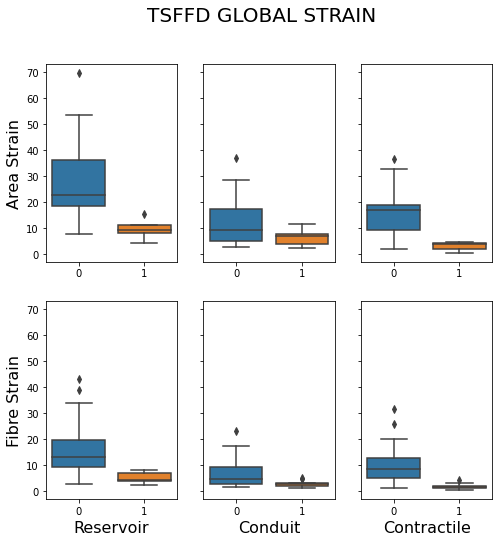

In [28]:
fig, ((ax1, ax2, ax3), 
      (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(8,8), sharey=True)

sns.boxplot(data=[res_naf, res_af], ax=ax1)
sns.boxplot(data=[cond_naf, cond_af], ax=ax2)
sns.boxplot(data=[cont_naf, cont_af], ax=ax3)

sns.boxplot(data=[res_naf_f, res_af_f], ax=ax4)
sns.boxplot(data=[cond_naf_f, cond_af_f], ax=ax5)
sns.boxplot(data=[cont_naf_f, cont_af_f], ax=ax6)

ax1.set_ylabel("Area Strain", fontsize=16)
ax4.set_ylabel("Fibre Strain", fontsize=16)

ax4.set_xlabel("Reservoir", fontsize=16)
ax5.set_xlabel("Conduit", fontsize=16)
ax6.set_xlabel("Contractile", fontsize=16)

fig.suptitle("TSFFD GLOBAL STRAIN", fontsize=20)

In [29]:
## print p values

res_p = stats.ttest_ind(res_af, res_naf)
cond_p = stats.ttest_ind(cond_af, cond_naf)
cont_p = stats.ttest_ind(cont_af, cont_naf)

print("tsffd strains\n")

print("area strains")
print("Reservoir p-val:\t", res_p)
print("Conduit p-val:\t\t", cond_p)
print("Contractile p-val:\t", cont_p)

res_p = stats.ttest_ind(res_af_f, res_naf_f)
cond_p = stats.ttest_ind(cond_af_f, cond_naf_f)
cont_p = stats.ttest_ind(cont_af_f, cont_naf_f)

print("fibre strains")
print("Reservoir p-val:\t", res_p)
print("Conduit p-val:\t\t", cond_p)
print("Contractile p-val:\t", cont_p)

tsffd strains

area strains
Reservoir p-val:	 Ttest_indResult(statistic=-3.486456782837771, pvalue=0.0016329534377927358)
Conduit p-val:		 Ttest_indResult(statistic=-1.746842203247631, pvalue=0.09162726415159084)
Contractile p-val:	 Ttest_indResult(statistic=-4.317949265203784, pvalue=0.00017821480971168474)
fibre strains
Reservoir p-val:	 Ttest_indResult(statistic=-3.3163536190610534, pvalue=0.0025322812446172886)
Conduit p-val:		 Ttest_indResult(statistic=-2.096043111132386, pvalue=0.04523990832916745)
Contractile p-val:	 Ttest_indResult(statistic=-3.1169810239637963, pvalue=0.004197297153606083)


Text(0.5, 0.98, 'VXM GLOBAL AREA STRAIN')

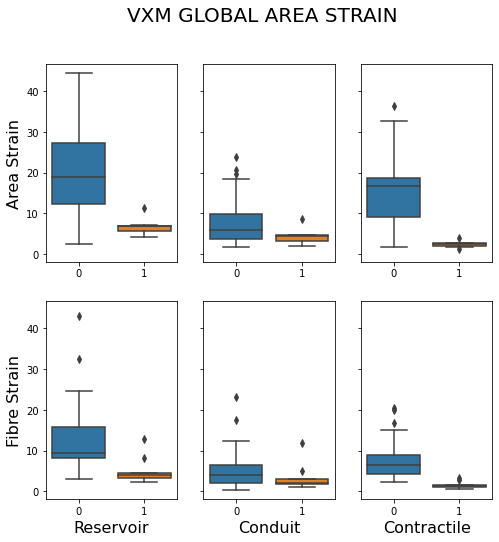

In [30]:
fig, ((ax1, ax2, ax3), 
      (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(8,8), sharey=True)

sns.boxplot(data=[res_naf_vxm, res_af_vxm], ax=ax1)
sns.boxplot(data=[cond_naf_vxm, cond_af_vxm], ax=ax2)
sns.boxplot(data=[cont_naf, cont_af_vxm], ax=ax3)

sns.boxplot(data=[res_naf_vxm_f, res_af_vxm_f], ax=ax4)
sns.boxplot(data=[cond_naf_vxm_f, cond_af_vxm_f], ax=ax5)
sns.boxplot(data=[cont_naf_vxm_f, cont_af_vxm_f], ax=ax6)

ax1.set_ylabel("Area Strain", fontsize=16)
ax4.set_ylabel("Fibre Strain", fontsize=16)

ax4.set_xlabel("Reservoir", fontsize=16)
ax5.set_xlabel("Conduit", fontsize=16)
ax6.set_xlabel("Contractile", fontsize=16)

fig.suptitle("VXM GLOBAL AREA STRAIN", fontsize=20)

In [31]:
## print p values

res_p = stats.ttest_ind(res_af_vxm, res_naf_vxm)
cond_p = stats.ttest_ind(cond_af_vxm, cond_naf_vxm)
cont_p = stats.ttest_ind(cont_af_vxm, cont_naf_vxm)

print("Vxm Strains\n")

print("Area strains")
print("Reservoir p-val:\t", res_p)
print("Conduit p-val:\t\t", cond_p)
print("Contractile p-val:\t", cont_p)

res_p = stats.ttest_ind(res_af_vxm_f, res_naf_vxm_f)
cond_p = stats.ttest_ind(cond_af_vxm_f, cond_naf_vxm_f)
cont_p = stats.ttest_ind(cont_af_vxm_f, cont_naf_vxm_f)

print("Fibre strains")
print("Reservoir p-val:\t", res_p)
print("Conduit p-val:\t\t", cond_p)
print("Contractile p-val:\t", cont_p)

Vxm Strains

Area strains
Reservoir p-val:	 Ttest_indResult(statistic=-3.5719086574688457, pvalue=0.001306915701121205)
Conduit p-val:		 Ttest_indResult(statistic=-1.990964513879231, pvalue=0.0563244122939557)
Contractile p-val:	 Ttest_indResult(statistic=-3.89634068407777, pvalue=0.0005544645410286432)
Fibre strains
Reservoir p-val:	 Ttest_indResult(statistic=-2.43354303994276, pvalue=0.02158860742512044)
Conduit p-val:		 Ttest_indResult(statistic=-1.098261007176414, pvalue=0.28144519679579794)
Contractile p-val:	 Ttest_indResult(statistic=-3.3491066325070573, pvalue=0.0023283360223083725)


In [32]:
## roc classification

y_true = np.zeros((cases_df.shape[0],))
y_true[naf_cases_idx] = 1.0

In [33]:
auc_res = metrics.roc_auc_score(y_true, strains[:, 0])
auc_cond = metrics.roc_auc_score(y_true, strains[:, 1])
auc_cont = metrics.roc_auc_score(y_true, strains[:, 2])

print("tsffd strains\n")

print("area strains")
print("Res auc\t\t\t", auc_res)
print("Cond auc\t\t", auc_cond)
print("Cont auc\t\t", auc_cont)

auc_res = metrics.roc_auc_score(y_true, fibre_strains[:, 0])
auc_cond = metrics.roc_auc_score(y_true, fibre_strains[:, 1])
auc_cont = metrics.roc_auc_score(y_true, fibre_strains[:, 2])

print("fibre strains")
print("Res auc\t\t\t", auc_res)
print("Cond auc\t\t", auc_cond)
print("Cont auc\t\t", auc_cont)

tsffd strains

area strains
Res auc			 0.9047619047619047
Cond auc		 0.6455026455026456
Cont auc		 0.9576719576719577
fibre strains
Res auc			 0.9312169312169313
Cond auc		 0.7354497354497355
Cont auc		 0.9206349206349206


In [34]:
auc_res = metrics.roc_auc_score(y_true, strains_vxm[:, 0])
auc_cond = metrics.roc_auc_score(y_true, strains_vxm[:, 1])
auc_cont = metrics.roc_auc_score(y_true, strains_vxm[:, 2])

print("area strains")
print("Res auc\t\t\t", auc_res)
print("Cond auc\t\t", auc_cond)
print("Cont auc\t\t", auc_cont)

auc_res = metrics.roc_auc_score(y_true, fibre_strains_vxm[:, 0])
auc_cond = metrics.roc_auc_score(y_true, fibre_strains_vxm[:, 1])
auc_cont = metrics.roc_auc_score(y_true, fibre_strains_vxm[:, 2])

print("fibre strains")
print("Res auc\t\t\t", auc_res)
print("Cond auc\t\t", auc_cond)
print("Cont auc\t\t", auc_cont)

area strains
Res auc			 0.8941798941798942
Cond auc		 0.7354497354497354
Cont auc		 0.9047619047619048
fibre strains
Res auc			 0.8412698412698413
Cond auc		 0.6243386243386243
Cont auc		 0.962962962962963


In [35]:
fibre_strains_vxm[:, 2]

array([ 2.83264 ,  4.36052 ,  9.9124  ,  6.55917 , 20.5505  ,  2.23201 ,
        2.22186 ,  6.39754 ,  4.58749 ,  2.88021 ,  3.64207 ,  5.15382 ,
        8.01559 ,  0.682999,  1.37193 ,  1.21807 ,  1.54557 ,  8.89977 ,
        1.48312 ,  0.944919,  7.39191 ,  7.872   ,  6.55828 , 16.729   ,
        2.25626 ,  1.02686 ,  3.24196 , 19.8492  ,  5.05119 , 15.0711  ])

In [36]:
fibre_strains[:, 2]

array([ 1.59164 ,  6.99581 , 19.3174  ,  8.34559 , 31.6836  ,  3.01923 ,
        1.17736 , 12.777   ,  5.05683 ,  4.06603 ,  4.58244 ,  8.14948 ,
       10.2913  ,  0.513064,  1.98984 ,  1.19731 ,  2.13437 ,  9.87037 ,
        1.20164 ,  4.31875 ,  9.1177  ,  7.16298 ,  8.39375 , 25.7098  ,
        1.25745 ,  1.02686 ,  3.24196 , 19.8492  ,  5.05119 , 15.0711  ])